In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift

In [10]:
df = pd.read_csv('checkins.txt', sep='|', header=0, skipinitialspace=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df = df.iloc[:100000, -3:-1].dropna()
df

,latitude,longitude
2,38.895112,-77.036366
4,33.800745,-84.410520
8,45.523452,-122.676207
10,40.764462,-111.904565
11,33.448377,-112.074037
...,...,...
99987,34.052234,-118.243685
99989,35.149534,-90.048980
99991,51.759248,19.455983
99992,36.114646,-115.172816


In [5]:
def closest_places(cluster_centers):
  office_addresses = [[34.2720355,-118.4693734], [33.7507188,-118.1889072], [27.9450524,-82.4455656],
                  [39.2650447,-76.6007999], [32.717609,-117.1761962], [37.804883,-122.4016302],
                  [49.2514431,-123.1277804], [32.7859233,-79.9333731], [30.6860768,-88.0394999],
                  [26.1216934,-80.1388889], [33.3882696,-111.6913768], [26.0853385,-80.1180988],
                  [30.0068944,-90.1633797], [29.3075638,-94.7986193], [28.4157244,-80.6310168],
                  [52.3787031,4.8849274], [47.3831508,8.4987319], [41.3905199,2.1570719],
                  [50.4356475,30.5142909], [53.4699633,-2.2947828]]
  best_centers = []
  min_distance = 2000
  closest_center = [1000, 1000]
  for address in office_addresses:
      best_distance = 2000
      best_centers.append([1000, 1000])
      for i in range(len(cluster_centers)):
          distance = (address[0] - cluster_centers.iloc[i, 1]) ** 2 + (address[1] - cluster_centers.iloc[i, 0]) ** 2
          if distance < best_distance:
              best_distance = distance
              best_centers[-1] = [cluster_centers.iloc[i, 1], cluster_centers.iloc[i, 0]]
      if best_distance < min_distance:
          closest_center = best_centers[-1]
          min_distance = best_distance
  return best_centers, closest_center

In [12]:
clst = MeanShift(bandwidth=0.1)
clst.fit(df)

MeanShift(bandwidth=0.1)

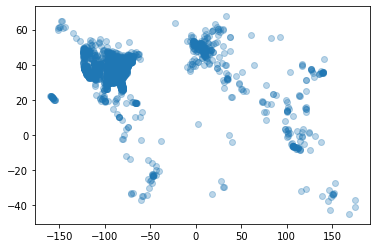

In [13]:
cluster_centers_x = [el[1] for el in clst.cluster_centers_]
cluster_centers_y = [el[0] for el in clst.cluster_centers_]
plt.scatter(x=cluster_centers_x, y=cluster_centers_y, alpha=0.3)

In [16]:
good_labels = []
for label in set(clst.labels_):
    if len(clst.labels_[clst.labels_ == label]) >= 15:
        good_labels.append(label)
cluster_centers = pd.DataFrame({'longitude': cluster_centers_x,
                                'latitude': cluster_centers_y, 'label': range(len(cluster_centers_x))})
good_cluster_centers = cluster_centers[cluster_centers['label'].isin(good_labels)]

In [17]:
best_centers, closest_center = closest_places(good_cluster_centers)

In [18]:
best_centers

[[34.205017046774174, -118.54792483064516],
 [33.80546317816908, -118.15448771478907],
 [27.9494415560975, -82.46510523902455],
 [39.28529530062884, -76.61547842138361],
 [32.71125728619976, -117.15347787813108],
 [37.72646636242612, -122.41451850231901],
 [49.242789338372184, -123.110506144186],
 [32.782066667391284, -79.9170199413044],
 [30.406725999999992, -87.20485637727278],
 [26.120071348461526, -80.15897098384606],
 [33.36010505333748, -111.82256392333228],
 [26.120071348461526, -80.15897098384606],
 [29.988497123809523, -90.2054063571428],
 [29.7626328999999, -95.38217382314582],
 [28.329003447368425, -80.6874151263158],
 [48.85951503703704, 2.34158581111111],
 [48.85951503703704, 2.34158581111111],
 [48.85951503703704, 2.34158581111111],
 [55.73942573999998, 37.631311319999995],
 [51.503447852083276, -0.12743302499999987]]

In [19]:
closest_center

[32.782066667391284, -79.9170199413044]